In [ ]:
!pip install torch torchvision torchaudio
!pip install nibabel
!pip install scipy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Training:   0%|          | 0/320 [00:06<?, ?it/s, accuracy=25, loss=0.613]

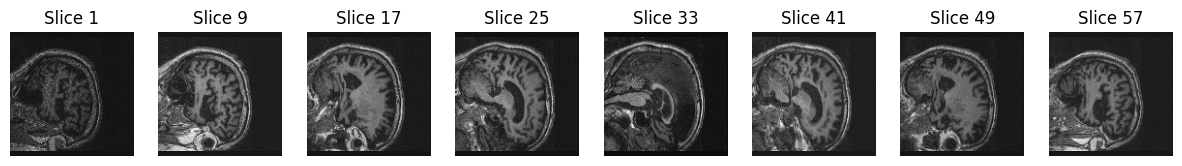

Training: 100%|██████████| 320/320 [29:20<00:00,  5.50s/it, accuracy=50.9, loss=0.724]


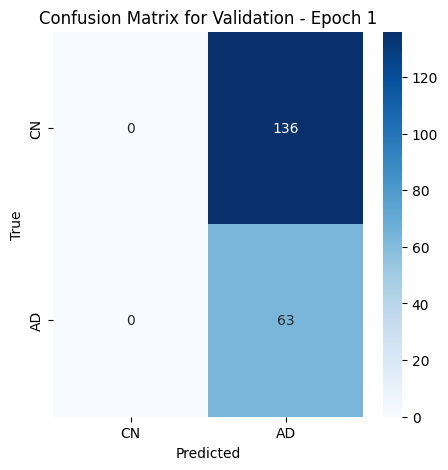

Epoch 1/10 - Train Loss: 0.7054, Train Acc: 50.86%, Val Loss: 0.7517, Val Acc: 31.66%
Validation Confusion Matrix:
 [[  0 136]
 [  0  63]]


Training: 100%|██████████| 320/320 [28:14<00:00,  5.29s/it, accuracy=51.4, loss=0.661]


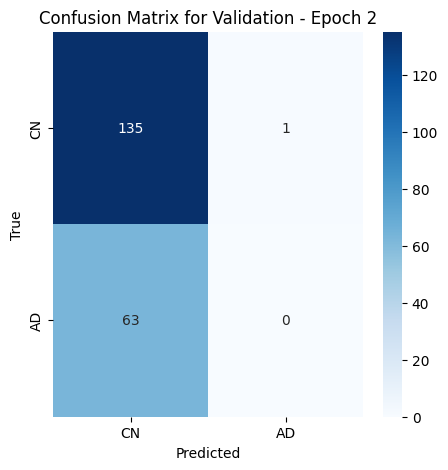

Epoch 2/10 - Train Loss: 0.7048, Train Acc: 51.41%, Val Loss: 0.6607, Val Acc: 67.84%
Validation Confusion Matrix:
 [[135   1]
 [ 63   0]]


Training: 100%|██████████| 320/320 [29:39<00:00,  5.56s/it, accuracy=53.8, loss=0.693]


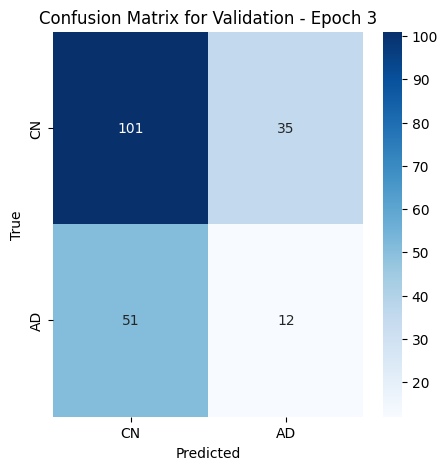

Epoch 3/10 - Train Loss: 0.6889, Train Acc: 53.83%, Val Loss: 1.2532, Val Acc: 56.78%
Validation Confusion Matrix:
 [[101  35]
 [ 51  12]]


Training: 100%|██████████| 320/320 [29:58<00:00,  5.62s/it, accuracy=56.6, loss=0.833]


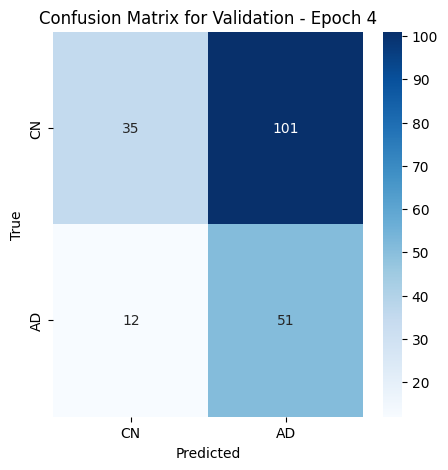

Epoch 4/10 - Train Loss: 0.6831, Train Acc: 56.56%, Val Loss: 0.6839, Val Acc: 43.22%
Validation Confusion Matrix:
 [[ 35 101]
 [ 12  51]]


Training: 100%|██████████| 320/320 [29:59<00:00,  5.62s/it, accuracy=56.2, loss=0.426]


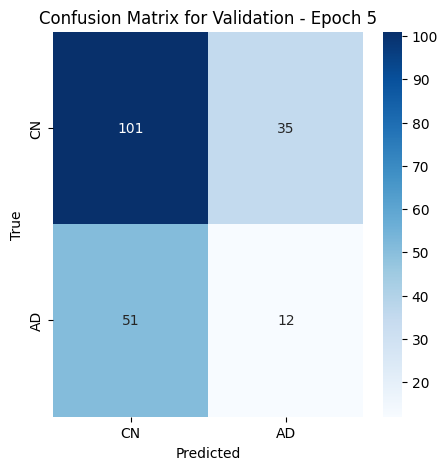

Epoch 5/10 - Train Loss: 0.6748, Train Acc: 56.17%, Val Loss: 0.9526, Val Acc: 56.78%
Validation Confusion Matrix:
 [[101  35]
 [ 51  12]]


Training: 100%|██████████| 320/320 [29:59<00:00,  5.62s/it, accuracy=60.5, loss=0.461]


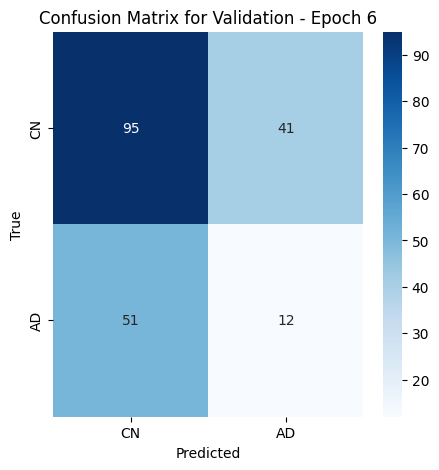

Epoch 6/10 - Train Loss: 0.6332, Train Acc: 60.47%, Val Loss: 0.7364, Val Acc: 53.77%
Validation Confusion Matrix:
 [[95 41]
 [51 12]]


Training: 100%|██████████| 320/320 [29:40<00:00,  5.57s/it, accuracy=61.5, loss=0.9]


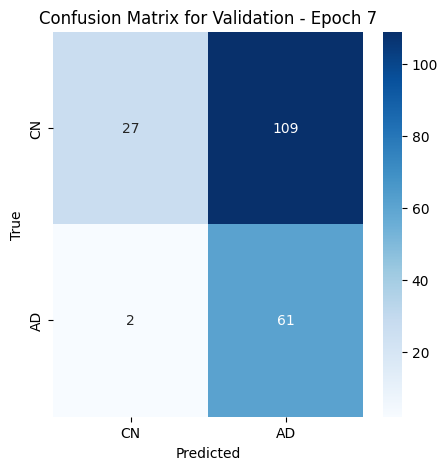

Epoch 7/10 - Train Loss: 0.6173, Train Acc: 61.48%, Val Loss: 0.6688, Val Acc: 44.22%
Validation Confusion Matrix:
 [[ 27 109]
 [  2  61]]


Training: 100%|██████████| 320/320 [29:55<00:00,  5.61s/it, accuracy=66.8, loss=0.371]


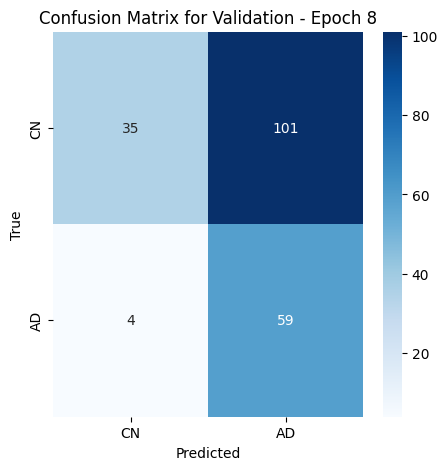

Epoch 8/10 - Train Loss: 0.5544, Train Acc: 66.80%, Val Loss: 0.6222, Val Acc: 47.24%
Validation Confusion Matrix:
 [[ 35 101]
 [  4  59]]


Training: 100%|██████████| 320/320 [29:54<00:00,  5.61s/it, accuracy=69.5, loss=0.557]


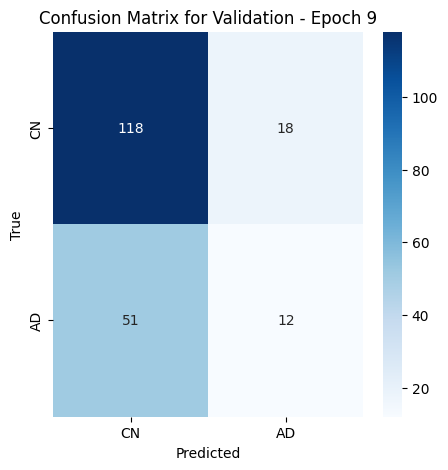

Epoch 9/10 - Train Loss: 0.5054, Train Acc: 69.53%, Val Loss: 0.7168, Val Acc: 65.33%
Validation Confusion Matrix:
 [[118  18]
 [ 51  12]]


Training: 100%|██████████| 320/320 [29:57<00:00,  5.62s/it, accuracy=71.4, loss=0.519]


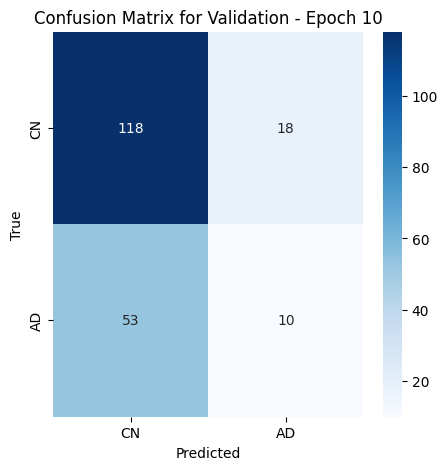

Epoch 10/10 - Train Loss: 0.4622, Train Acc: 71.41%, Val Loss: 0.8170, Val Acc: 64.32%
Validation Confusion Matrix:
 [[118  18]
 [ 53  10]]


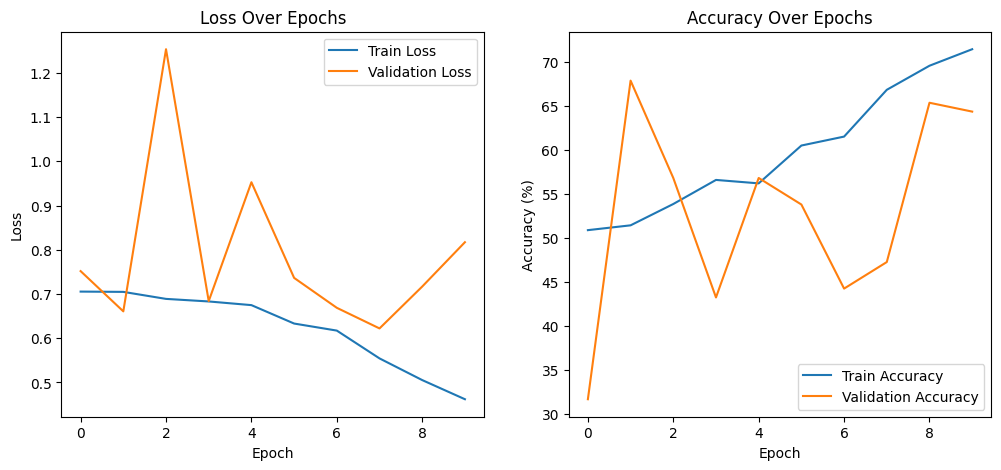

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

from scipy.ndimage import zoom
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm


class NiiDataset(Dataset):
    # (176, 240, 256) --> Crop by [40:-40, :-48, 48:] --> (96, 192, 208) --> Padding --> (96, 208, 208) --> Downsampling --> (64, 128, 128)
    # (170, 256, 256) --> Crop by [40:-40, :-48, 48:] --> (90, 208, 208) --> Padding --> (96, 208, 208) --> Downsampling --> (64, 128, 128)
    # (160, 240, 256) --> Crop by [40:-40, :-48, 48:] --> (80, 192, 208) --> Padding --> (96, 208, 208) --> Downsampling --> (64, 128, 128)
    def __init__(self, base_dir, target_shape=(64, 128, 128), padding_shape=(96, 208, 208), oversample_ad=True):
        self.base_dir = base_dir
        self.target_shape = target_shape
        self.padding_shape = padding_shape

        # Ensure the AD directory exists
        ad_dir = os.path.join(base_dir, 'AD')
        if not os.path.exists(ad_dir):
            raise FileNotFoundError(f"Expected directory does not exist: {ad_dir}")

        # Ensure the CN directory exists
        cn_dir = os.path.join(base_dir, 'CN')
        if not os.path.exists(cn_dir):
            raise FileNotFoundError(f"Expected directory does not exist: {cn_dir}")

        self.ad_files = [os.path.join(base_dir, 'AD', f) for f in os.listdir(os.path.join(base_dir, 'AD')) if f.endswith('.nii')]
        self.cn_files = [os.path.join(base_dir, 'CN', f) for f in os.listdir(os.path.join(base_dir, 'CN')) if f.endswith('.nii')]

        if oversample_ad:
          # Calculate how many times AD files need to be repeated to match CN files (OVERSAMPLE minority class)
           repeat_factor = len(self.cn_files) // len(self.ad_files)
           self.ad_files = self.ad_files * repeat_factor + self.ad_files[:len(self.cn_files) % len(self.ad_files)]

        self.files = self.ad_files + self.cn_files
        self.labels = [1] * len(self.ad_files) + [0] * len(self.cn_files)

    def __len__(self):
        return len(self.files)

    def __getitem__(self, index):
        file_path = self.files[index]
        img = nib.load(file_path).get_fdata()

        # Crop the image
        cropped_img = img[40:-40, :-48, 48:]

        # Pad the image
        padded_img = np.pad(cropped_img,
                            [(max(0, (self.padding_shape[0] - cropped_img.shape[0]) // 2),
                              max(0, (self.padding_shape[0] - cropped_img.shape[0]) - (self.padding_shape[0] - cropped_img.shape[0]) // 2)),
                             (max(0, (self.padding_shape[1] - cropped_img.shape[1]) // 2),
                              max(0, (self.padding_shape[1] - cropped_img.shape[1]) - (self.padding_shape[1] - cropped_img.shape[1]) // 2)),
                             (max(0, (self.padding_shape[2] - cropped_img.shape[2]) // 2),
                              max(0, (self.padding_shape[2] - cropped_img.shape[2]) - (self.padding_shape[2] - cropped_img.shape[2]) // 2))],
                            'constant')

        # Resize to the target shape
        zoom_factors = [n / o for n, o in zip(self.target_shape, padded_img.shape)]
        img_resized = zoom(padded_img, zoom_factors, order=3)

        # Add channel dimension and convert to tensor
        img_tensor = torch.from_numpy(img_resized).unsqueeze(0).float()
        label_tensor = torch.tensor(self.labels[index], dtype=torch.long)

        return img_tensor, label_tensor


# Model architecture
class Deeper3DCNN(nn.Module):
    def __init__(self):
        super(Deeper3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv3d(128, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv3d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv3d(256, 256, kernel_size=3, padding=1)
        self.conv6 = nn.Conv3d(256, 512, kernel_size=3, padding=1)
        self.pool = nn.MaxPool3d(2)
        self.bn1 = nn.BatchNorm3d(64)
        self.bn2 = nn.BatchNorm3d(128)
        self.bn3 = nn.BatchNorm3d(128)
        self.bn4 = nn.BatchNorm3d(256)
        self.bn5 = nn.BatchNorm3d(256)
        self.bn6 = nn.BatchNorm3d(512)
        self.global_avg_pool = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.fc1 = nn.Linear(512, 1024)
        self.fc2 = nn.Linear(1024, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.relu(self.bn1(self.pool(self.conv1(x))))
        x = self.relu(self.bn2(self.pool(self.conv2(x))))
        x = self.relu(self.bn3(self.pool(self.conv3(x))))
        x = self.relu(self.bn4(self.pool(self.conv4(x))))
        x = self.relu(self.bn5(self.pool(self.conv5(x))))
        x = self.relu(self.bn6(self.pool(self.conv6(x))))
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# Setup paths and DataLoader
base_path = '/content/drive/My Drive/3D_DATA'
# Data structure
# 3D_DATA
  ## TRAIN
    ### CN
    ### AD
  ## VAL
    ### CN
    ### AD
  ## TEST
    ### CN
    ### AD
train_dataset = NiiDataset(os.path.join(base_path, 'TRAIN'))
val_dataset = NiiDataset(os.path.join(base_path, 'VAL'), oversample_ad=False)
test_dataset = NiiDataset(os.path.join(base_path, 'TEST'), oversample_ad=False)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

# Define the model, optimizer, and loss function
model = Deeper3DCNN()
optimizer = optim.Adam(model.parameters(), lr=0.00005)
criterion = nn.CrossEntropyLoss()

def plot_mri_slices(image_tensor, num_slices=8):
    """Plots a series of slices from the MRI image tensor."""
    image = image_tensor.squeeze().numpy()  # Remove channel dimension and convert to numpy array
    slice_step = image.shape[0] // num_slices  # Determine step to evenly pick slices
    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    for i in range(num_slices):
        ax = axes[i]
        slice_idx = i * slice_step
        ax.imshow(image[slice_idx], cmap='gray')
        ax.axis('off')
        ax.set_title(f'Slice {slice_idx + 1}')
    plt.show()


def train_epoch(loader, model, optimizer, criterion, epoch):
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    progress_bar = tqdm(loader, desc="Training", leave=True)
    for batch_idx, (inputs, targets) in enumerate(progress_bar):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == targets).sum().item()
        total_samples += inputs.size(0)

        progress_bar.set_postfix(loss=loss.item(), accuracy=100. * total_correct / total_samples)

        if epoch == 0 and batch_idx == 0:  # Optionally, plot only for the first batch of the first epoch
          plot_mri_slices(inputs[0], num_slices=8)  # Plot slices from the first MRI in the batch
    return total_loss / total_samples, 100. * total_correct / total_samples


def validate_epoch(loader, model, criterion, epoch, plot_cm=False):
    model.eval()
    total_loss, total_correct, total_samples = 0, 0, 0
    all_predictions, all_targets = [], []
    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == targets).sum().item()
            total_samples += inputs.size(0)

            all_predictions.extend(predicted.view(-1).cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_targets, all_predictions)
    if plot_cm:
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['CN', 'AD'], yticklabels=['CN', 'AD'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix for Validation - Epoch {epoch+1}')
        plt.show()

    return total_loss / total_samples, 100. * total_correct / total_samples, cm

# Running the training and validation
num_epochs = 10
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(train_loader, model, optimizer, criterion, epoch)
    val_loss, val_accuracy, val_cm = validate_epoch(val_loader, model, criterion, epoch, plot_cm=True)

    # Append losses and accuracies for plotting
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print epoch summary
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")
    print("Validation Confusion Matrix:\n", val_cm)
    # Save model after each epoch
    torch.save(model.state_dict(), f'/content/drive/My Drive/3D_CNN_Oversample_lr00005_batch4_Epoch_{epoch+1}.pth')

# Plot training and validation statistics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


In [ ]:
# Evaluation function
def evaluate_model(loader, model):
    y_true, y_pred = [], []
    model.eval()
    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(targets.numpy())
            y_pred.extend(predicted.numpy())
    return y_true, y_pred

# Running evaluation
y_true, y_pred = evaluate_model(test_loader, model)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
specificity = recall_score(y_true, y_pred, pos_label=0, average='binary')
conf_matrix = confusion_matrix(y_true, y_pred)

# Print and plot results
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, Specificity: {specificity:.2f}")
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()